In [3]:
import numpy as np
import scipy.stats as stats

# Define parameters for the distributions
mu = 0      # Mean for Normal distribution
sigma = 1   # Standard deviation for Normal distribution
df_t = 10   # Degrees of freedom for T-distribution
df_chi2 = 5 # Degrees of freedom for Chi-square distribution
df_f1, df_f2 = 5, 10 # Degrees of freedom for F-distribution

# Example: Using Normal Distribution (N(mu, sigma))
dist = stats.norm(mu, sigma)  # Normal distribution

# a) P(X <= 0) and P(X >= 0)
p_x_leq_0 = dist.cdf(0)  # P(X <= 0)
p_x_geq_0 = 1 - dist.cdf(0)  # P(X >= 0)

# b) P(-1 <= X <= 1) and P(X <= -1 or X >= 1)
p_x_in_range = dist.cdf(1) - dist.cdf(-1)  # P(-1 <= X <= 1)
p_x_out_range = 1 - p_x_in_range  # P(X <= -1 or X >= 1)

# c) Find x_alpha for P(X < x_alpha) = alpha
alpha = 0.05
x_alpha = dist.ppf(alpha)

# d) Find x_beta for P(X > x_beta) = beta
beta = 0.05
x_beta = dist.isf(beta)  # Equivalent to 1 - PPF

# Display results
print("a) P(X <= 0):", p_x_leq_0, ", P(X >= 0):", p_x_geq_0)
print("b) P(-1 <= X <= 1):", p_x_in_range, ", P(X <= -1 or X >= 1):", p_x_out_range)
print("c) x_alpha (alpha=0.05):", x_alpha)
print("d) x_beta (beta=0.05):", x_beta)


a) P(X <= 0): 0.5 , P(X >= 0): 0.5
b) P(-1 <= X <= 1): 0.6826894921370859 , P(X <= -1 or X >= 1): 0.31731050786291415
c) x_alpha (alpha=0.05): -1.6448536269514729
d) x_beta (beta=0.05): 1.6448536269514729


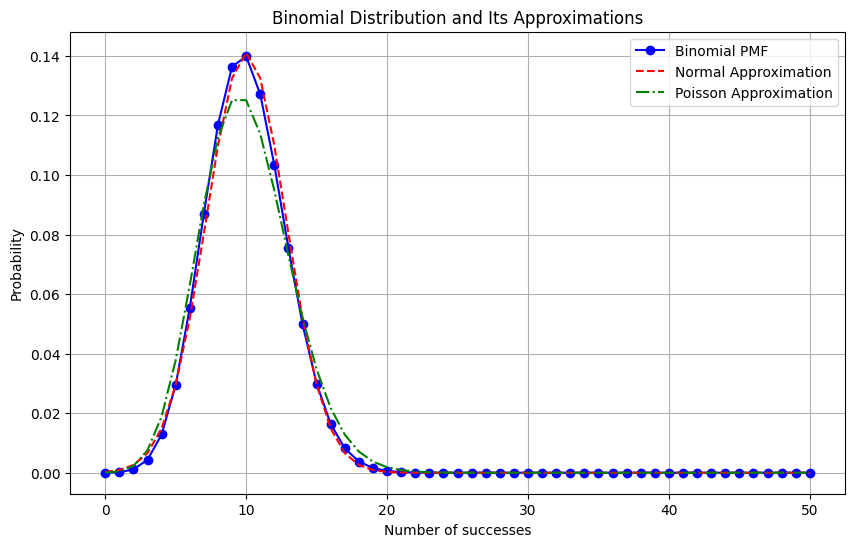

In [4]:
import matplotlib.pyplot as plt

# Parameters
n = 50    # Number of trials
p = 0.2   # Probability of success
lambda_poisson = n * p  # Poisson parameter
mu = n * p  # Mean for Normal approximation
sigma = np.sqrt(n * p * (1 - p))  # Std for Normal approximation

# Binomial distribution
k = np.arange(0, n+1)
binomial_pmf = stats.binom.pmf(k, n, p)

# Normal approximation
normal_pdf = stats.norm.pdf(k, mu, sigma)

# Poisson approximation
poisson_pmf = stats.poisson.pmf(k, lambda_poisson)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k, binomial_pmf, 'bo-', label='Binomial PMF')
plt.plot(k, normal_pdf, 'r--', label='Normal Approximation')
plt.plot(k, poisson_pmf, 'g-.', label='Poisson Approximation')
plt.title('Binomial Distribution and Its Approximations')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()